# Tutorials Pytorch Audio

 - https://pytorch.org/tutorials/beginner/audio_preprocessing_tutorial.html
 - https://keithito.com/LJ-Speech-Dataset/
 - https://microsoft.github.io/ELL/tutorials/Training-audio-keyword-spotter-with-pytorch/

## Install libs in python to processing audio

## Convert audio mp3 to wav

```python
from os import path
from pydub import AudioSegment

# files                                                                    
src = "original.mp3"
dst = "modified.wav"

# convert wav to mp3                                                            
sound = AudioSegment.from_mp3(src)
sound.export(dst, format="wav")
```

## Download audio

In [1]:
import requests


filename = 'camoes.wav'#'steam-train-whistle-daniel_simon-converted-from-mp3.wav'

#url_audio = f"https://pytorch.org/tutorials/_static/img/{filename}"
#request = requests.get(url_audio)

#with open(filename, 'wb') as fileaudio:
    # write audio to fileaudio
    #fileaudio.write(request.content)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


## Read audio
  - Shape waveform
  - Sample rate waveform

In [2]:
import torch
import torchaudio


torchaudio.set_audio_backend("sox_io")
waveform, sample_rate = torchaudio.load(filename)

print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

Shape of waveform: torch.Size([2, 276480])
Sample rate of waveform: 44100


In [3]:
# Let's check if the tensor is in the interval [-1,1]
print(f"Min of waveform: {waveform.min()}")
print(f"Max of waveform: {waveform.max()}")
print(f"Mean of waveform: {waveform.mean()}")

Min of waveform: -0.106842041015625
Max of waveform: 0.0989990234375
Mean of waveform: -2.652296416272293e-06


## Graphic serie audio

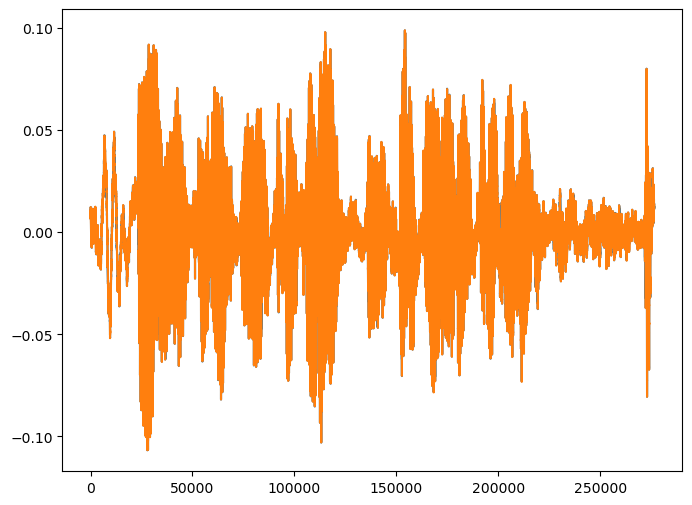

In [4]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.plot(waveform.t().numpy())
plt.show()

## Load to listen

In [5]:
import IPython.display as ipd

ipd.Audio(filename)

## Show colors to cmap

## torchaudio supports a growing list of transformations.

 - **Resample**: Resample waveform to a different sample rate.
 - **Spectrogram**: Create a spectrogram from a waveform.
 - **GriffinLim**: Compute waveform from a linear scale magnitude spectrogram using the Griffin-Lim transformation.
 - **ComputeDeltas**: Compute delta coefficients of a tensor, usually a spectrogram.
 - **ComplexNorm**: Compute the norm of a complex tensor.
 - **MelScale**: This turns a normal STFT into a Mel-frequency STFT, using a conversion matrix.
 - **AmplitudeToDB**: This turns a spectrogram from the power/amplitude scale to the decibel scale.
 - **MFCC**: Create the Mel-frequency cepstrum coefficients from a waveform.
 - **MelSpectrogram**: Create MEL Spectrograms from a waveform using the STFT function in PyTorch.
 - **MuLawEncoding**: Encode waveform based on mu-law companding.
 - **MuLawDecoding**: Decode mu-law encoded waveform.
 - **TimeStretch**: Stretch a spectrogram in time without modifying pitch for a given rate.
 - **FrequencyMasking**: Apply masking to a spectrogram in the frequency domain.
 - **TimeMasking**: Apply masking to a spectrogram in the time domain.

### Transforms **Spectrogram** with cmap='Spectral'

Shape of spectrogram: torch.Size([2, 201, 1383])


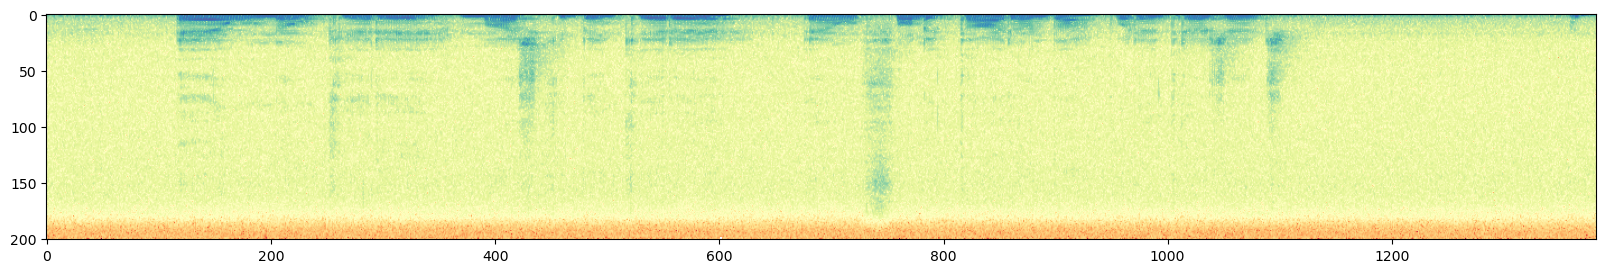

In [6]:
specgram = torchaudio.transforms.Spectrogram()(waveform)

print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure(figsize=(20,10))
plt.imshow(specgram.log2()[0,:,:].numpy(), cmap='Spectral')
plt.show()

### Transforms **Spectrogram** with cmap='gray'

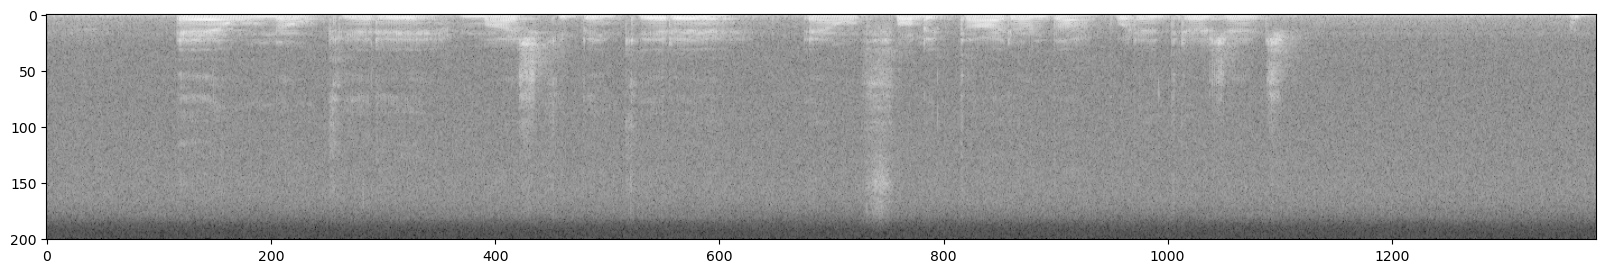

In [7]:
plt.figure(figsize=(20,10))
plt.imshow(specgram.log2()[1,:,:].numpy(), cmap='gray')
plt.show()

### Transforms **MelSpectrogram** with cmap='Default'

/usr/lib/python3/dist-packages/torchaudio/functional/functional.py:571: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


Shape of spectrogram: torch.Size([2, 128, 1383])


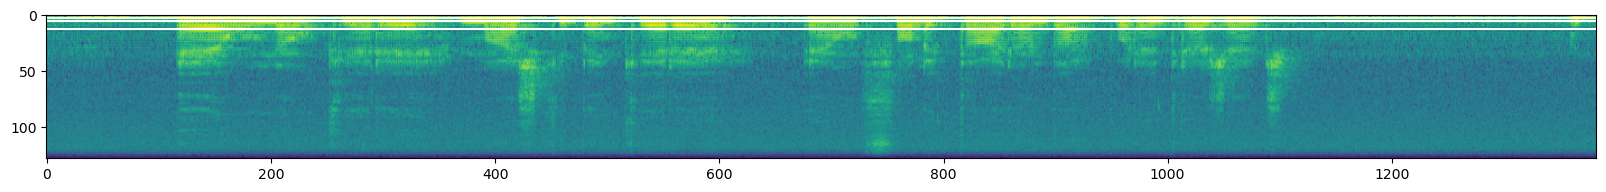

In [8]:
specgram = torchaudio.transforms.MelSpectrogram()(waveform)
print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure(figsize=(20,10))
p = plt.imshow(specgram.log2()[0,:,:].detach().numpy())
plt.show()

Shape of transformed waveform: torch.Size([1, 27648])


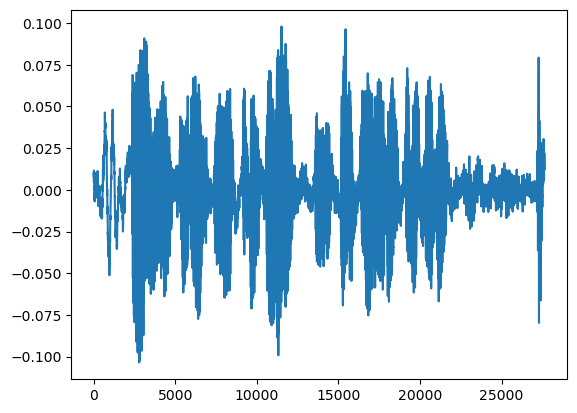

In [9]:
new_sample_rate = sample_rate / 10

# Since Resample applies to a single channel, we resample first channel here
channel = 0
transformed = torchaudio.transforms.Resample(sample_rate, new_sample_rate)(waveform[channel,:].view(1,-1))

print("Shape of transformed waveform: {}".format(transformed.size()))

plt.figure()
plt.plot(transformed[0,:].numpy())
plt.show()

### Normalize waveform

In [10]:
def normalize(tensor):
    # Subtract the mean, and scale to the interval [-1,1]
    tensor_minusmean = tensor - tensor.mean()
    return tensor_minusmean / tensor_minusmean.abs().max()
# Let's normalize to the full interval [-1,1]
waveform = normalize(waveform)

### Audio Original

Min of waveform: -1.0
Max of waveform: 0.9266402125358582
Mean of waveform: 9.106265186353824e-10


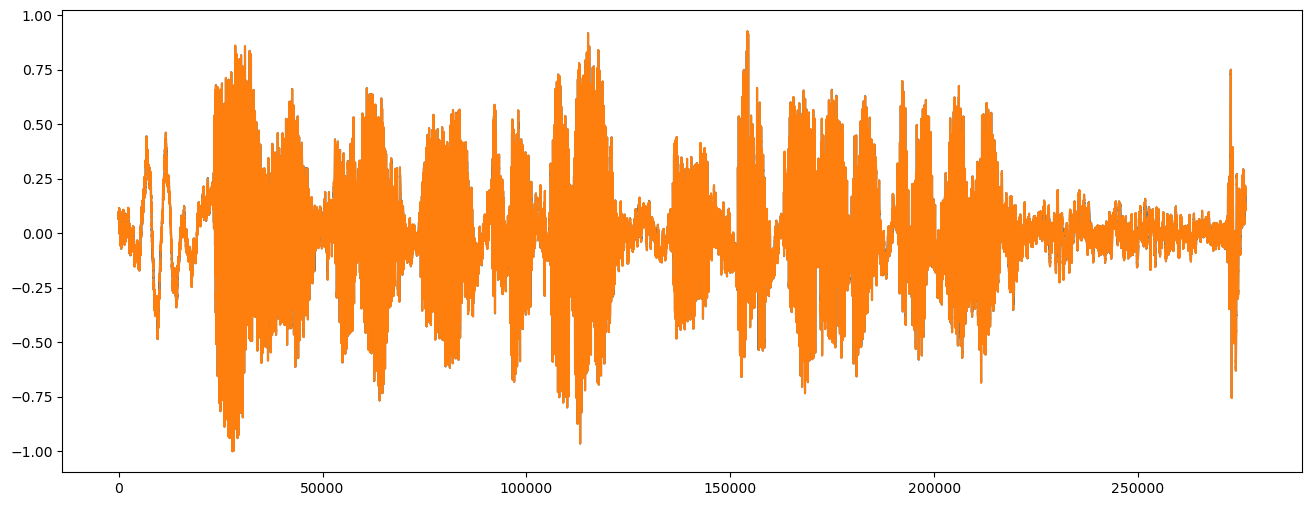

In [11]:
print(f"Min of waveform: {waveform.min()}")
print(f"Max of waveform: {waveform.max()}")
print(f"Mean of waveform: {waveform.mean()}")
plt.figure(figsize=(16, 6))
plt.plot(waveform.t().numpy())
plt.show()

### Functional **gain**

Min of gain_waveform: -1.778279423713684
Max of gain_waveform: 1.6478252410888672
Mean of gain_waveform: 1.4211292143073706e-09


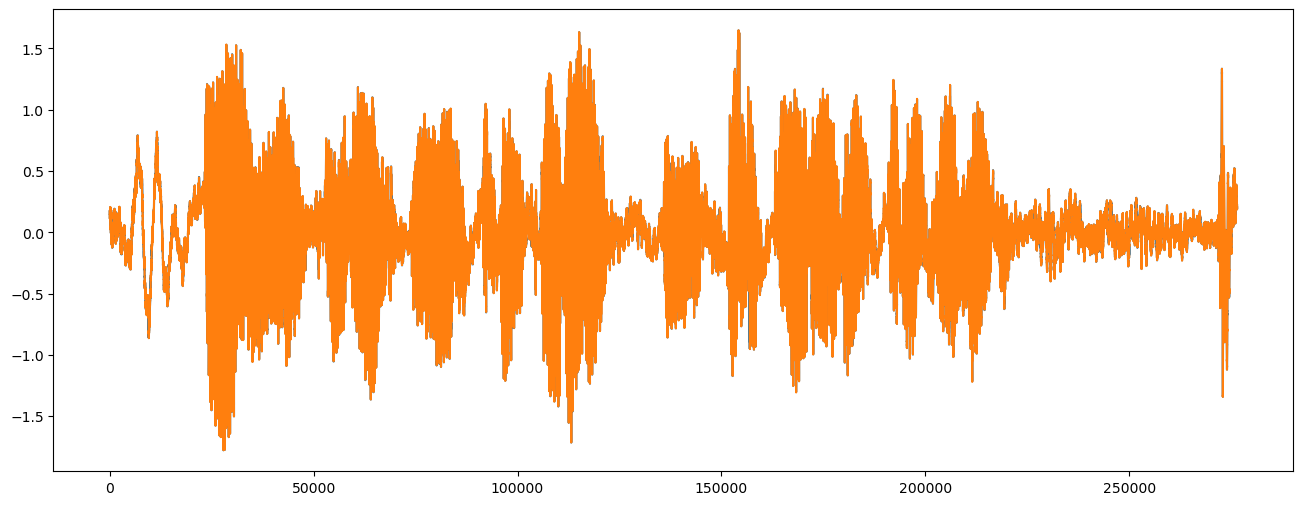

In [12]:
gain_waveform = torchaudio.functional.gain(waveform, gain_db=5.0)
print(f"Min of gain_waveform: {gain_waveform.min()}")
print(f"Max of gain_waveform: {gain_waveform.max()}")
print(f"Mean of gain_waveform: {gain_waveform.mean()}")
plt.figure(figsize=(16, 6))
plt.plot(gain_waveform.t().numpy())
plt.show()

### Functional **lowpass_biquad**

Min of lowpass_waveform: -0.9919459819793701
Max of lowpass_waveform: 0.920634925365448
Mean of lowpass_waveform: -1.3390763342613354e-06


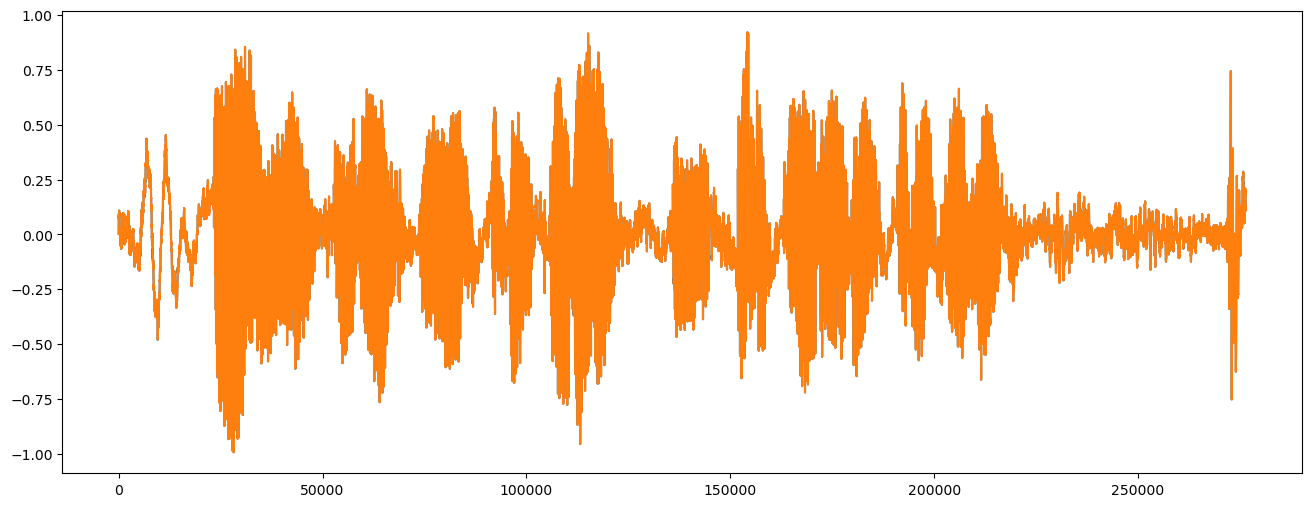

In [13]:
lowpass_waveform = torchaudio.functional.lowpass_biquad(waveform, sample_rate, cutoff_freq=3000)
print(f"Min of lowpass_waveform: {lowpass_waveform.min()}")
print(f"Max of lowpass_waveform: {lowpass_waveform.max()}")
print(f"Mean of lowpass_waveform: {lowpass_waveform.mean()}")
plt.figure(figsize=(16, 6))
plt.plot(lowpass_waveform.t().numpy())
plt.show()

### Functional **highpass_biquad**

Min of highpass_waveform: -0.2600785791873932
Max of highpass_waveform: 0.28382158279418945
Mean of highpass_waveform: 1.0726728838506006e-08


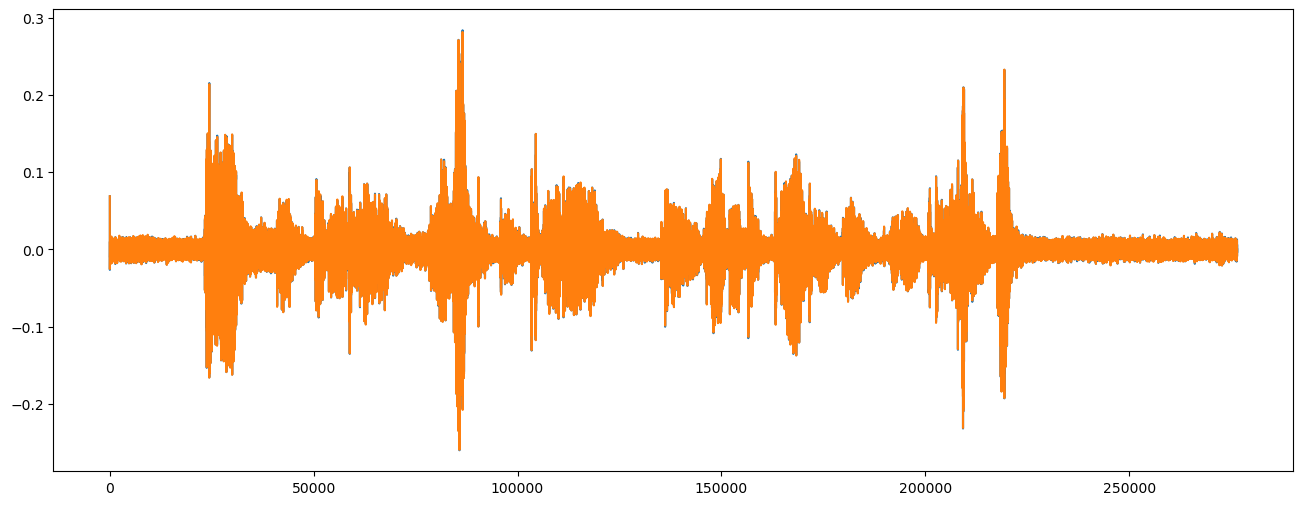

In [14]:
highpass_waveform = torchaudio.functional.highpass_biquad(waveform, sample_rate, cutoff_freq=2000)
print(f"Min of highpass_waveform: {highpass_waveform.min()}")
print(f"Max of highpass_waveform: {highpass_waveform.max()}")
print(f"Mean of highpass_waveform: {highpass_waveform.mean()}")
plt.figure(figsize=(16, 6))
plt.plot(highpass_waveform.t().numpy())
plt.show()